<a href="https://colab.research.google.com/github/MdBilal420/pytorch-fundamentals/blob/main/pytorch_workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [118]:
weight = 0.6
bias = 0.4

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
Y = weight*X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [119]:
train_split = int(0.80*len(X))
train_split

40

In [120]:
train_X = X[:train_split]
train_Y = Y[:train_split]
test_X = X[train_split:]
test_Y = Y[train_split:]


In [121]:
def plot_predictions(train_data=train_X,train_labels=train_Y,test_data=test_X,test_labels=test_Y,predictions=None):
  plt.figure(figsize=(10,8))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Traininng Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})




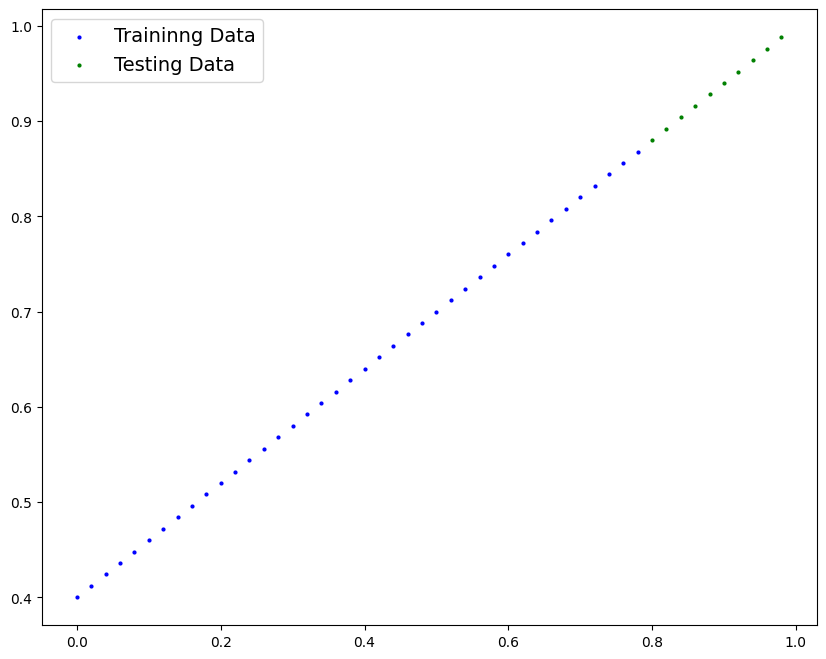

In [122]:
plot_predictions()

In [123]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias



In [124]:
weight,bias

(0.6, 0.4)

In [125]:
# MODEL INSTANCE CREATION
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [126]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [127]:
with torch.inference_mode():
  y_preds = model_0(test_X)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [128]:
test_Y

tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])

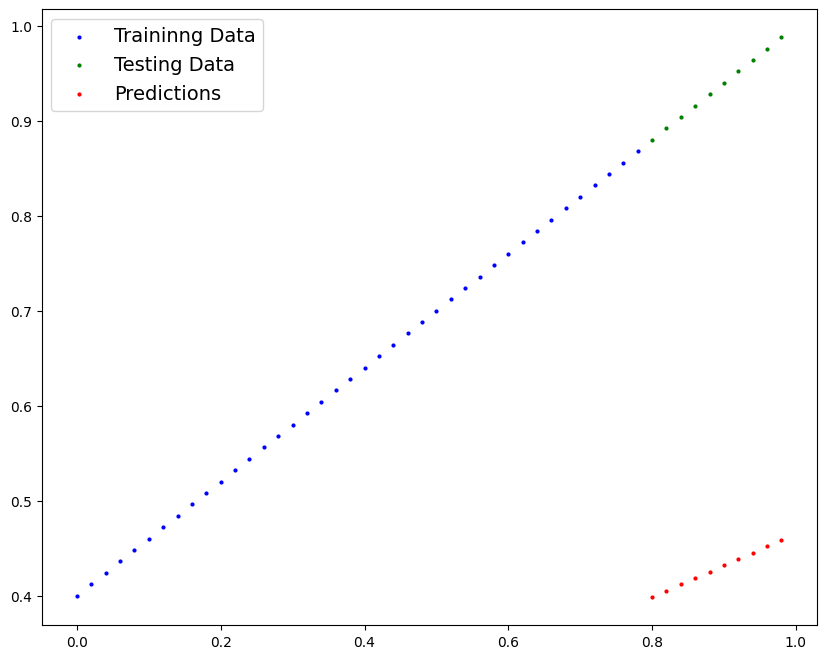

In [129]:
plot_predictions(predictions=y_preds)

In [130]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [131]:
loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [132]:

torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
  #0 TRAINING
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(train_X)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, train_Y)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()

  # TESTING
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(test_X)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, test_Y)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())



Epoch: 0 | Train loss: 0.37388134002685547 | Test loss: 0.4920651316642761
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Train loss: 0.2586713433265686 | Test loss: 0.3573552668094635
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Train loss: 0.1434614360332489 | Test loss: 0.2226453274488449
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch: 30 | Train loss: 0.03848728537559509 | Test loss: 0.09741605818271637
OrderedDict([('weights', tensor([0.4571])), ('bias', tensor([0.4298]))])
Epoch: 40 | Train loss: 0.023863982409238815 | Test loss: 0.05760536342859268
OrderedDict([('weights', tensor([0.4827])), ('bias', tensor([0.4468]))])
Epoch: 50 | Train loss: 0.02031884901225567 | Test loss: 0.04659420996904373
OrderedDict([('weights', tensor([0.5007])), ('bias', tensor([0.4418]))])
Epoch: 60 | Train loss: 0.01688215509057045 | Test loss: 0.039008546620607376
OrderedDict([('weights', te

In [133]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5989])), ('bias', tensor([0.4088]))])

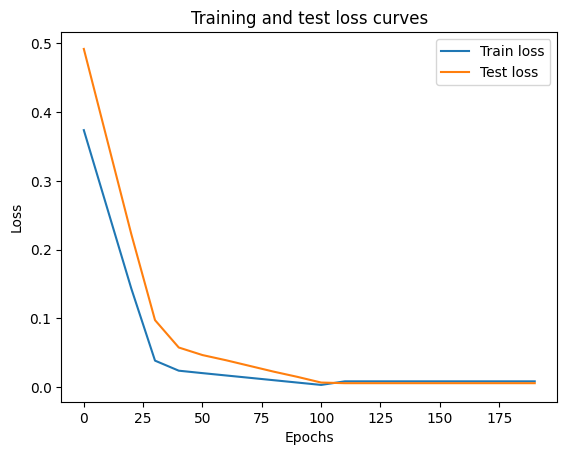

In [134]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count,  np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [135]:
with torch.inference_mode():
  y_preds_new = model_0(test_X)

In [136]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5989])), ('bias', tensor([0.4088]))])

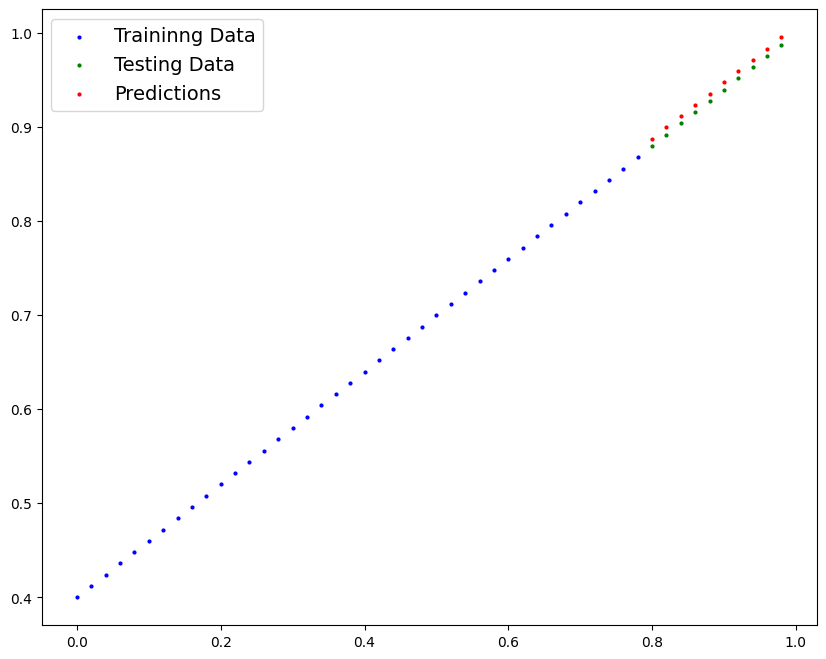

In [137]:
plot_predictions(predictions=y_preds_new)

In [140]:
#SAVE

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


In [141]:
#Load

In [142]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5989])), ('bias', tensor([0.4088]))])

In [144]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-144-b11c3559e97b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [145]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5989])), ('bias', tensor([0.4088]))])

In [146]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(test_X)

loaded_model_preds

tensor([[0.8879],
        [0.8999],
        [0.9118],
        [0.9238],
        [0.9358],
        [0.9478],
        [0.9598],
        [0.9717],
        [0.9837],
        [0.9957]])

In [148]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])